In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
import seaborn as sns

In [2]:
data = pd.read_csv('card_transdata.csv', sep=',')

In [3]:
X = data.drop(columns=['fraud'])
y = data['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
print("TensorFlow version :", tf.__version__)
print("GPU disponible :", tf.config.list_physical_devices('GPU'))

TensorFlow version : 2.18.0
GPU disponible : []


In [6]:
# Création du modèle ANN
model_ann = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

c:\Users\delah\anaconda3\envs\GPTK\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilation du modèle
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Entraînement
history = model_ann.fit(
    X_train, y_train,
    epochs=50,
    batch_size=1024,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9378 - loss: 0.1516 - val_accuracy: 0.9940 - val_loss: 0.0170
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9907 - loss: 0.0249 - val_accuracy: 0.9961 - val_loss: 0.0104
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9935 - loss: 0.0172 - val_accuracy: 0.9968 - val_loss: 0.0081
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9948 - loss: 0.0139 - val_accuracy: 0.9972 - val_loss: 0.0069
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9958 - loss: 0.0116 - val_accuracy: 0.9978 - val_loss: 0.0057
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9962 - loss: 0.0100 - val_accuracy: 0.9984 - val_loss: 0.0043
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9966 - loss: 0.0090 - val_accuracy: 0.9983 - val_loss: 0.0045
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9970 - loss: 0.0081 - val_accuracy: 0.

In [8]:
# Prédictions
y_pred_ann = (model_ann.predict(X_test) > 0.5).astype(int)

# Évaluation
print("Réseau de Neurones :")
print(classification_report(y_test, y_pred_ann))
print(confusion_matrix(y_test, y_pred_ann))

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 4s 592us/step
Réseau de Neurones :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182519
         1.0       0.99      0.99      0.99     17481

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000

[[182387    132]
 [    89  17392]]


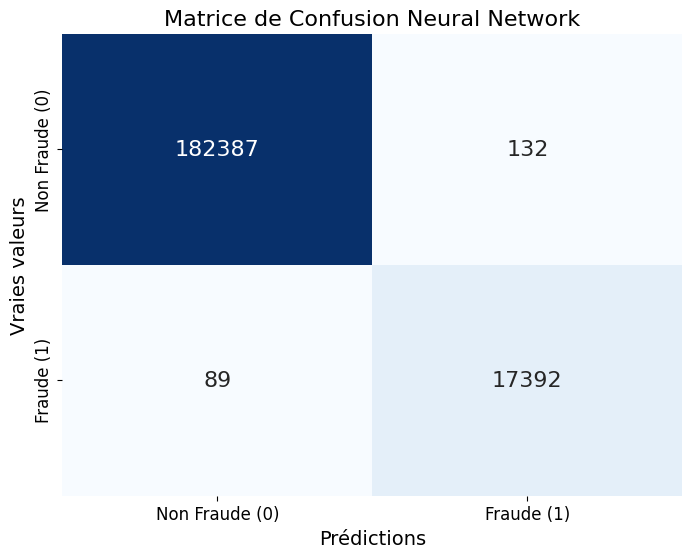

In [9]:
# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred_ann)

# Création du graphique
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})

# Ajout des labels et du titre
plt.xlabel('Prédictions', fontsize=14)
plt.ylabel('Vraies valeurs', fontsize=14)
plt.title('Matrice de Confusion Neural Network', fontsize=16)
plt.xticks(ticks=[0.5, 1.5], labels=['Non Fraude (0)', 'Fraude (1)'], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=['Non Fraude (0)', 'Fraude (1)'], fontsize=12)

# Afficher le graphique
plt.show()

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 4s 587us/step
AUC-ROC pour le réseau de neurones : 1.0000


C:\Users\delah\AppData\Local\Temp\ipykernel_23256\3866738057.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)', color='red')


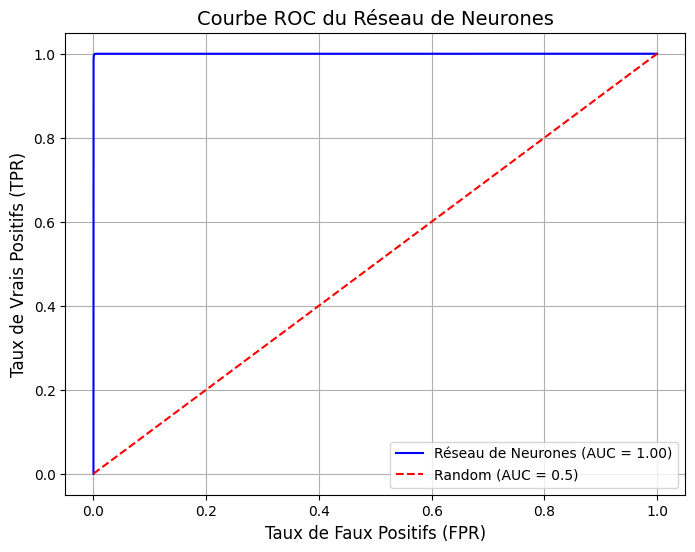

In [10]:
# Obtenir les probabilités pour la classe positive (fraude)
y_proba_ann = model_ann.predict(X_test).flatten()  # Utiliser predict() pour obtenir les probabilités

# Calcul du score AUC-ROC
auc_ann = roc_auc_score(y_test, y_proba_ann)
print(f"AUC-ROC pour le réseau de neurones : {auc_ann:.4f}")

# Calcul des courbes ROC
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_proba_ann)

# Tracé de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_ann, tpr_ann, label=f"Réseau de Neurones (AUC = {auc_ann:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)', color='red')

# Personnalisation du graphique
plt.xlabel('Taux de Faux Positifs (FPR)', fontsize=12)
plt.ylabel('Taux de Vrais Positifs (TPR)', fontsize=12)
plt.title('Courbe ROC du Réseau de Neurones', fontsize=14)
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [11]:
from sklearn.metrics import fbeta_score

# Calcul du F2-score
f2 = fbeta_score(y_test, y_pred_ann, beta=2)
print(f"F2-score : {f2:.4f}")

F2-score : 0.9944
